# Unemployment Rates 

### Introduction
Using data from the Bureau of Labor statistics, we aim to uncover trends in unemployment based on various factors and demographics. Additionally, focusing on the past few months, we analyze how the recent pandemic has affected people in each of these categories, and attempt to explain the reasons these categories are affected differently. Our research question is which attribute (out of gender, race, and education level) influences unemployment rate the most. We find that race is the biggest indicator of unemployment.


### Data Description
- Rows: The observations are the year and month of occurence of the following attributes.
- Columns: The attributes are the number of people in the US that fit under each of the following categories 
    - Unemployment Rate
    - Unemployment Rate Age 16-19
    - Unemployment Rate Age 20 & Over Men 
    - Unemployment Rate Age 20 & Over Women 
    - Unemployment Rate White
    - Unemployment Rate Black or African American
    - Unemployment Rate Asian
    - Unemployment Rate Hispanic or Latino
    - Unemployment Rate Age 25 & Over Less than a High School Diploma
    - Unemployment Rate Age 25 & Over High School Diploma (No College)
    - Unemployment Rate Age 25 & Over Some College or Associate's Degree
    - Unemployment Rate Age 25 & Over Bachelors Degree and Higher
    - Average Weeks Unemployed
- This dataset was created to deliver important data relating to jobs and unemployment in the United States for the American citizens, businesses, and the US Government. 
- An arm of The U.S. Departments of Labor, The Bureau of Labor Statistics or BLS, is responsible for collecting this dataset. 
- The Bureau of Labor Statistics collects data using a variety of methods including surveys and censuses. There is a fine for inaccurately  filling out a census, but it is still possible for people to  report inaccurately which would result in certain things being recorded and others not. There are also some people usually undocumented immigrants who don’t fill out a census which could result in inaccurate data collection. 
- Once people submit their censuses, the data is collected by the employees of The Bureau of Labor Statistics and made into interpretable statistical models. We webscraped data from categories that we thought would provide relevant patterns across attributes like race, sex, and education levels.
- People are well aware of the data being collected. The collection of data relies on peoples submission of required surveys and censuses. As stated earlier, everyone is required to fill out the census (citizens and noncitizens) and failure to do so results in fines. 
- Raw Source Data: https://data.bls.gov/cgi-bin/surveymost?ln

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.linear_model import LinearRegression as lr


In [2]:
data = pd.read_csv("unemployment.csv")
data

,Year,Month,Unemployment Rate,Unemployment Rate - 16-19 yrs.,"Unemployment Rate - 20 yrs. & over, Men","Unemployment Rate - 20 yrs. & over, Women",Unemployment Rate - White,Unemployment Rate - Black or African American,Unemployment Rate - Asian,Unemployment Rate - Hispanic or Latino,"Unemployment Rate - Less than a High School Diploma, 25 yrs. & over","Unemployment Rate - High School Graduates, No College, 25 yrs. & over","Unemployment Rate - Some College or Associate Degree, 25 yrs. & over","Unemployment Rate - Bachelor's degree and higher, 25 yrs. & over",Average Weeks Unemployed
0,2010,Jan,9.8,26.1,10.2,7.9,8.8,16.5,8.3,12.9,15.3,10.2,8.6,4.9,30.3
1,2010,Feb,9.8,25.6,10.3,8.0,8.9,16.1,8.2,12.7,15.8,10.7,8.1,4.9,29.8
2,2010,Mar,9.9,26.2,10.2,8.1,8.9,16.8,7.6,12.9,14.9,11.0,8.4,4.9,31.6
3,2010,Apr,9.9,25.4,10.2,8.3,9.0,16.6,7.0,12.5,14.7,10.8,8.4,4.8,33.3
4,2010,May,9.6,26.5,9.7,8.1,8.7,15.5,7.8,12.0,14.6,10.9,8.2,4.6,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2019,Nov,3.5,12.0,3.2,3.2,3.2,5.6,2.6,4.2,5.3,3.7,2.9,2.0,20.2
119,2019,Dec,3.5,12.6,3.1,3.2,3.2,5.9,2.5,4.2,5.2,3.7,2.7,1.9,20.8
120,2020,Jan,3.6,12.2,3.3,3.2,3.1,6.0,3.0,4.3,5.5,3.8,2.8,2.0,21.9
121,2020,Feb,3.5,11.0,3.3,3.1,3.1,5.8,2.5,4.4,5.7,3.6,3.0,1.9,20.9


The raw data that was webscraped from the Bureau of Labor Statistics. Observes the unemployment rate for each of the column categories over the course of 10 years, from January 2010 to March 2020, accounting for each month.

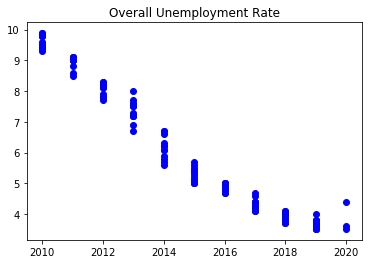

Mean: 6.160


In [6]:
year = data["Year"]
overall = data["Unemployment Rate"]
plt.scatter(year, overall, color = "blue")
plt.title("Overall Unemployment Rate")
plt.show()
print("Mean: {mean:.3f}".format(mean = data["Unemployment Rate"].mean()))

This is the overall unemployment rate. It is important to note that unemployment rate is calculated by the number of unemployed people (people over 16 actively looking for work) over the number of people in the labor force (employed and unemployed). From 2010 to 2020 we see that there is a steady decline in unemployment rate with slight variations in each year, with a slight shift in the data at the start of 2020 due to the rise of coronavirus. 

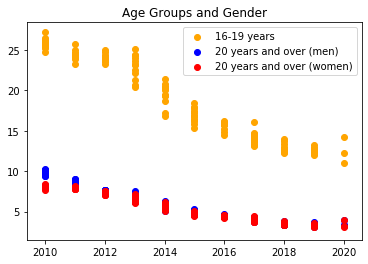

Mean for 16-19 years: 18.744
Standard deviation: 4.975

Mean for men: 5.849
Standard deviation: 2.161

Mean for women: 5.485
Standard deviation: 1.751


In [7]:
young = data["Unemployment Rate - 16-19 yrs."]
men = data["Unemployment Rate - 20 yrs. & over, Men"]
women = data["Unemployment Rate - 20 yrs. & over, Women"]

plt.scatter(year, young, color = 'orange', label = '16-19 years')
plt.scatter(year, men, color = 'blue', label = '20 years and over (men)')
plt.scatter(year, women, color = 'red', label = '20 years and over (women)')
plt.title("Age Groups and Gender")
plt.legend()
plt.show()

print("Mean for 16-19 years: {mean:.3f}".format(mean = young.mean()))
print("Standard deviation: {std:.3f}".format(std = young.std()))
print()
print("Mean for men: {mean:.3f}".format(mean = men.mean()))
print("Standard deviation: {std:.3f}".format(std = men.std()))
print()
print("Mean for women: {mean:.3f}".format(mean = women.mean()))
print("Standard deviation: {std:.3f}".format(std = women.std()))

From this data we see that amongst age and gender groups, the unemployment rate steadily declines throughout the decade. The 16-19 years age group  has a much higher average unemployment rate than those 20 years and over, which is to be expected due to many people in this age group still being in school and not working. The standard deviation for this group is also greater as some choose not to go to school and go straight into the workforce. Men have a slightly higher average unemployment rate than women.

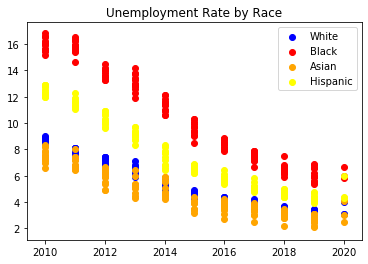

Mean for Whites: 5.455
Standard deviation: 1.881

Mean for Blacks: 10.693
Standard deviation: 3.616

Mean for Asians: 4.680
Standard deviation: 1.668

Mean for Hispanics: 7.660
Standard deviation: 2.837


In [22]:
white = data["Unemployment Rate - White"]
black = data["Unemployment Rate - Black or African American"]
asian = data["Unemployment Rate - Asian"]
hispanic = data["Unemployment Rate - Hispanic or Latino"]

plt.scatter(year, white, color = 'blue', label='White')
plt.scatter(year, black, color = 'red', label='Black')
plt.scatter(year, asian, color = 'orange', label = 'Asian')
plt.scatter(year, hispanic, color = 'yellow', label='Hispanic')

plt.title("Unemployment Rate by Race")
plt.legend()
plt.show()

print("Mean for Whites: {mean:.3f}".format(mean = white.mean()))
print("Standard deviation: {std:.3f}".format(std = white.std()))
print()
print("Mean for Blacks: {mean:.3f}".format(mean = black.mean()))
print("Standard deviation: {std:.3f}".format(std = black.std()))
print()
print("Mean for Asians: {mean:.3f}".format(mean = asian.mean()))
print("Standard deviation: {std:.3f}".format(std = asian.std()))
print()
print("Mean for Hispanics: {mean:.3f}".format(mean = hispanic.mean()))
print("Standard deviation: {std:.3f}".format(std = hispanic.std()))

From this data we can see that White and Asian groups have significantly lower rates of unemployment than their Black and Hispanic counterparts. We also see that the Black or African American group has the highest unemployement rate, with an average of 10.69.

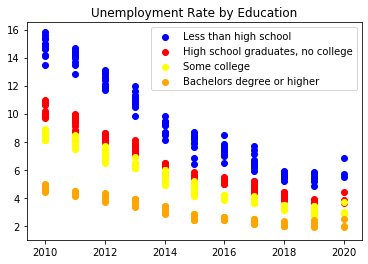

Mean for Less than High School: 9.329
Standard deviation: 3.343

Mean for High School Graduates with no college: 6.391
Standard deviation: 2.224

Mean for Some College: 5.338
Standard deviation: 1.895

Mean for Bachelors degree or higher: 3.128
Standard deviation: 0.938


In [9]:
less = data["Unemployment Rate - Less than a High School Diploma, 25 yrs. & over"]
highschool = data["Unemployment Rate - High School Graduates, No College, 25 yrs. & over"]
college = data["Unemployment Rate - Some College or Associate Degree, 25 yrs. & over"]
bachelors = data["Unemployment Rate - Bachelor's degree and higher, 25 yrs. & over"]

plt.scatter(year, less, color = 'blue', label='Less than high school')
plt.scatter(year, highschool, color = 'red', label='High school graduates, no college')
plt.scatter(year, college, color = 'yellow', label='Some college')
plt.scatter(year, bachelors, color = 'orange', label='Bachelors degree or higher')
plt.title("Unemployment Rate by Education")
plt.legend()
plt.show()

print("Mean for Less than High School: {mean:.3f}".format(mean = less.mean()))
print("Standard deviation: {std:.3f}".format(std = less.std()))
print()
print("Mean for High School Graduates with no college: {mean:.3f}".format(mean = highschool.mean()))
print("Standard deviation: {std:.3f}".format(std = highschool.std()))
print()
print("Mean for Some College: {mean:.3f}".format(mean = college.mean()))
print("Standard deviation: {std:.3f}".format(std = college.std()))
print()
print("Mean for Bachelors degree or higher: {mean:.3f}".format(mean = bachelors.mean()))
print("Standard deviation: {std:.3f}".format(std = bachelors.std()))

From this data we can see that the general trend is that unemployment rate goes down the more education a person has. It is interesting to see that at the start of 2020, with the development of coronavirus, those with less than a high school degree seem to be disproportionately affected by unemployment, as shown by the highest standard deviation.

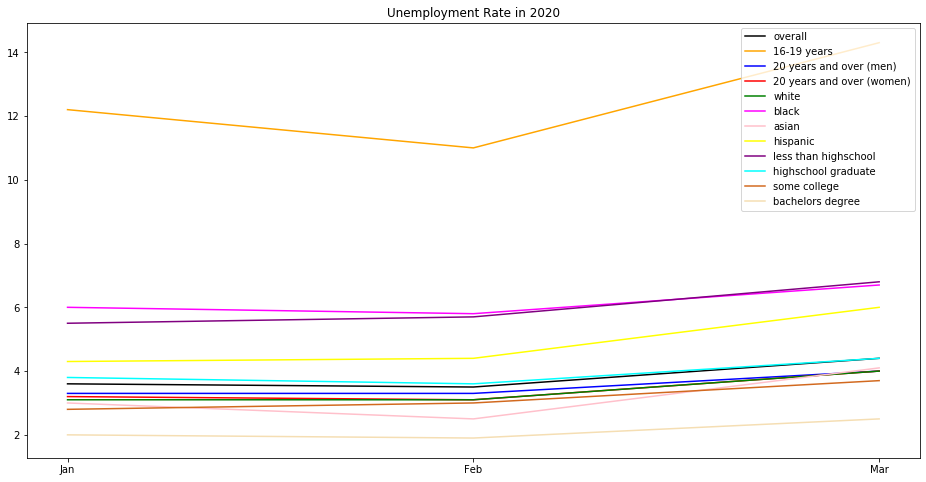

In [41]:
plt.figure(figsize=(16,8))

plt.plot(data["Month"][120:], overall[120:], color = 'black', label = 'overall')
plt.title("Unemployment Rate in the First Three Months of 2020")

plt.plot(data["Month"][120:], young[120:], color = 'orange', label = '16-19 years')
plt.plot(data["Month"][120:], men[120:], color = 'blue', label = '20 years and over (men)')
plt.plot(data["Month"][120:], women[120:], color = 'red', label = '20 years and over (women)')

plt.plot(data["Month"][120:], white[120:], color = 'green', label = 'white')
plt.plot(data["Month"][120:], black[120:], color = 'magenta', label = 'black')
plt.plot(data["Month"][120:], asian[120:], color = 'pink', label = 'asian')
plt.plot(data["Month"][120:], hispanic[120:], color = 'yellow', label = 'hispanic')

plt.plot(data["Month"][120:], less[120:], color = 'purple', label = 'less than highschool')
plt.plot(data["Month"][120:], highschool[120:], color = 'cyan', label = 'highschool graduate')
plt.plot(data["Month"][120:], college[120:], color = 'chocolate', label = 'some college')
plt.plot(data["Month"][120:], bachelors[120:], color = 'wheat', label = 'bachelors degree')
plt.title("Unemployment Rate in 2020")
plt.legend()
plt.show()


The above graphs depict the unemployment rates for the first three months of 2020, when the coronavirus started to develop as a pandemic. Besides the 16-19 years category, it is quite evident that the black and African American group as well as those with less than a high school degree has been affected the most. Those with a bachelor's degree or higher have been affected the least, but there is still an increase in unemployment from February to March among all categories.

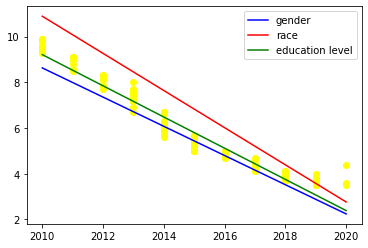

Gender coefficient: -0.638
Race coefficient: -0.812
Education level coefficient: -0.682


In [16]:
x = year.values.reshape(-1,1)
m = men.values.reshape(-1,1)
w = women.values.reshape(-1,1)
wh = white.values.reshape(-1,1)
b = black.values.reshape(-1,1)
a = asian.values.reshape(-1,1)
h = hispanic.values.reshape(-1,1)
l = less.values.reshape(-1,1)
hi = highschool.values.reshape(-1,1)
c = college.values.reshape(-1,1)
ba = bachelors.values.reshape(-1,1)

linear_g = lr()
linear_r = lr()
linear_e = lr()

gslope = linear_g.fit(x,(m+w)/2)
y_pred_gender = linear_g.predict(x)

rslope = linear_r.fit(x, (wh+b+a+h)/4)
y_pred_race = linear_r.predict(x)

eslope = linear_e.fit(x, (l+hi+c+ba)/4)
y_pred_education = linear_e.predict(x)


plt.scatter(x,overall, color = 'yellow')
plt.plot(x,y_pred_gender, color='blue', label='gender')
plt.plot(x,y_pred_race, color='red', label='race')
plt.plot(x,y_pred_education, color='green', label='education level')

plt.legend()
plt.show()

print("Gender coefficient: {coef:.3f}".format(coef = float(gslope.coef_)))
print("Race coefficient: {coef:.3f}".format(coef = float(rslope.coef_)))
print("Education level coefficient: {coef:.3f}".format(coef = float(eslope.coef_)))

Since people under the age of 20 have significantly higher unemployment rates given that many of them are in school, we omitted the age category as a predictor and used the averages of gender, race, and education level to observe the greatest predictor of unemployment rate. As seen by the linear regression lines and their slopes, race has the highest correlation in unemployment rate over the years. 

The disparity between race and the other two categories was greatest in 2010 but has been gradually decreasing. While it can be said that the growing concern for diversity in workplaces and activism against employment discrimination show to be working, there is still ways to go. 

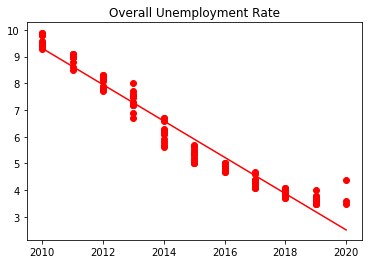

Slope: -0.680


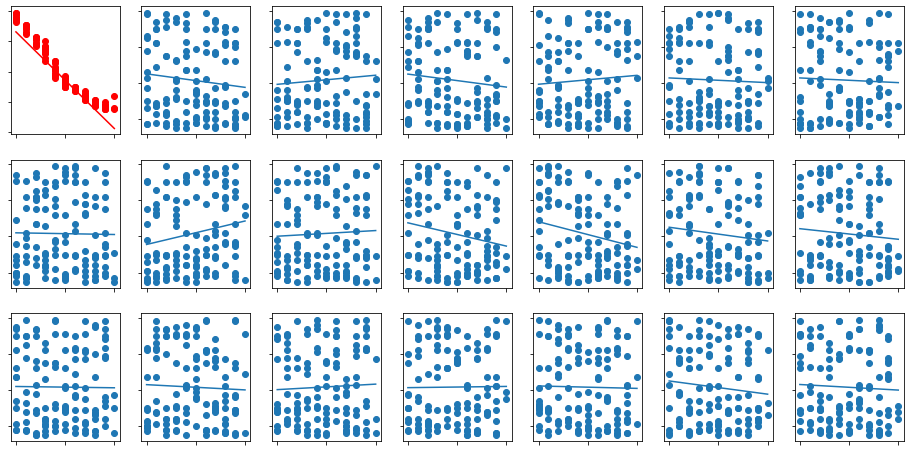

In [18]:
#returns random order of y values
def permuted_y():
    return np.random.permutation(overall.copy())

y = overall.values.reshape(-1,1)
model = lr().fit(x,y)
predicted_y = model.predict(x)
original_slope = model.coef_[0]

#overall data points and regression line
plt.scatter(x,y, color="red")
plt.plot(x,predicted_y, color = "red")
plt.title("Overall Unemployment Rate")
plt.show()
print("Slope: {slope:.3f}".format(slope = float(original_slope)))

plt.figure(figsize=(16,8))
for panel in range(1,22):
    plt.subplot(3,7,panel)
    if panel == 1:
        #plot original data in the first panel
        plt.scatter(year,overall,color="red")
        plt.plot(year,linear_g.predict(x), color="red")
    else:
        fake_y = permuted_y()
        permuted_model = lr().fit(x,fake_y)
        permuted_slope = permuted_model.coef_[0]
        permuted_predicted = permuted_model.predict(x)
        plt.scatter(x, fake_y)
        color = "blue"
        if permuted_slope > original_slope:
            color = "red"
        plt.plot(x,permuted_predicted)
    plt.tick_params(labelbottom=False)
    plt.tick_params(labelleft=False)

The simulations above reflect the iterations of randomly shuffled unemployment rates. The graphs in red are the original overall unemployment rate graphs, with a calculated slope of -.680. The graphs in blue are permuted y values (overall unemployment rate) that have been randomly paired with x values (the years). Any slope that is steeper than the original slope would show up in red. As seen by the simulation, no trial's slope is steeper than the original overall unemployment rate. This shows that there is a strong correlation between unemployment rate and the given attributes, and suggests that they do not merely arise from chance.

Number of steeper slopes: 0


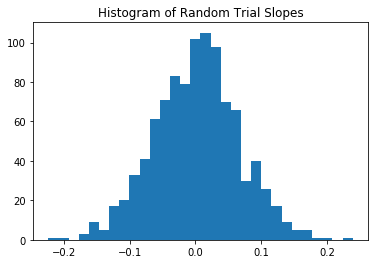

In [220]:
fake_slopes = np.zeros(1000)
steeper_slopes = 0
for i in range(1000):
    #regression for one random permutation
    fake_y = permuted_y()
    permuted_model = lr().fit(x, fake_y)
    fake_slope = permuted_model.coef_[0]
    fake_slopes[i] = fake_slope
    if np.abs(fake_slope) > np.abs(original_slope):
        steeper_slopes += 1
    
print("Number of steeper slopes: {}".format(steeper_slopes))

plt.hist(fake_slopes,bins=30)
plt.title("Histogram of Random Trial Slopes")
plt.show()

The histogram above runs the same randomization trials as before, but instead of displaying all the graphs of the trials, it displays the frequency of the random slopes generated. Out of 1000 trials, more than 100 trials have a slope of 0, which is illustrates that the majority of our random shuffles of unemployment rates as a function of time have a slope of 0. Counting the number of steeper slopes, we observe that there are no slopes steeper than the original graph's, which reinforces our previous conclusion that it is highly unlikely the negative correlation (-.680 slope) of overall unemployment rates came from random chance.

### Conclusion
Based on our findings we were able to analyze various different groups of people and to what degree they have been affected by unemployment. We found that race has the greatest overall impact on unemployment rates, with gender coming in second and then education level being the least affected factor. Comparing the rates over a period of 10 years we see that all unemployment rates in each of these categories have gone down, and the impact that race has on unemployment has become less significant, though not negligible. While this may be indicative of employers diversifying their hires, broader implications arise as people of color (particularly African Americans and Hispanics) are disproportionately affected, especially in times of crises such as now with the pandemic. It is important that our research not only displays disparities within groups but is used to instigate change within hiring practices.

Through our tests we can also say with confidence that our findings are feasible, as randomizing the unemployment rates generated graphs with less correlated slopes. While we are confident in the findings based on the presented data, there may still be some issues pertaining the quality of the dataset. Potential problems of the dataset include the accuracy of the results, given that they are self-recorded from participators of the census, and those that do not partake in the survey are not included in the dataset. Another aspect we did not account for (and the BLS did not provide) are members of residual categories, who do not fit into the limited choices presented. These members are obligated to tick off a box they may not completely identify with. Similarly, the data collected from BLS places individuals in specific categories, without acknowledging the intersection between these categories. There is most likely a relation between race and education level which correlates to higher unemployment rates. It would not be surprising to see how the intersection of these categories can further the disparagement of members within marginalized communities. 

Nonetheless, the data presented illustrates the need for more equity in workplaces, particularly now, when many people are finding themselves without jobs in the midst of a global crisis. 

### Source Code

https://github.com/ariyafeng/info2950

### Acknowledgements

Idea for data: https://www.kaggle.com/aniruddhasshirahatti/us-unemployment-rate-analysis-updated/data

Greg's permutation tutorial on canvas

